<a href="https://colab.research.google.com/github/Abhijith-Nagarajan/PadhAI_Implementations/blob/main/PyTorch_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import numpy as np
import math
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import time
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing,model_selection,metrics
from tqdm import tqdm_notebook

#### Numpy vs Torch

In [ ]:
t1_cpu = torch.rand(10000,10000)
t2_cpu = torch.rand(10000,10000)
n1 = np.random.rand(10000,10000)
n2 = np.random.rand(10000,10000)

In [ ]:
%timeit
torch.matmul(t1_cpu,t2_cpu)

tensor([[2499.9170, 2493.0967, 2480.2927,  ..., 2465.6812, 2514.3569,
         2483.8689],
        [2540.5813, 2527.1001, 2526.7402,  ..., 2506.1538, 2546.0852,
         2532.7439],
        [2540.2122, 2548.6917, 2546.8420,  ..., 2508.9221, 2566.0166,
         2555.8655],
        ...,
        [2504.7231, 2474.8550, 2495.3953,  ..., 2460.7991, 2495.2456,
         2494.7983],
        [2504.6807, 2530.6089, 2494.1211,  ..., 2480.5576, 2524.7429,
         2513.0647],
        [2523.5400, 2519.4895, 2523.3132,  ..., 2509.4067, 2548.7229,
         2529.1426]])

In [ ]:
%timeit
np.matmul(n1,n2)

array([[2494.48525009, 2510.9557902 , 2501.27198668, ..., 2542.19756653,
        2529.59649212, 2517.05596801],
       [2492.04236243, 2532.09265513, 2487.90038279, ..., 2531.46015206,
        2544.00345436, 2505.05793283],
       [2460.46887452, 2451.59334611, 2453.55103164, ..., 2483.40292216,
        2486.46785132, 2457.29986758],
       ...,
       [2489.53173066, 2490.35439993, 2484.20228343, ..., 2522.37800905,
        2524.27809434, 2484.08090673],
       [2468.54952269, 2504.44917688, 2495.78776398, ..., 2529.1117802 ,
        2507.81712966, 2502.10996621],
       [2483.60196609, 2490.52045157, 2486.87966377, ..., 2510.76372723,
        2529.8636999 , 2490.42027807]])

#### Torch with GPU

In [ ]:
# Connecting to a GPU
torch.cuda.device_count()

1

In [ ]:
torch.cuda.device(0)

In [ ]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
cuda_obj = torch.device('cuda:0')

In [ ]:
start = time.time()
for i in range(10):
    t1 = torch.rand([10000,10000],device=cuda_obj)
    t2 = torch.rand([10000,10000],device=cuda_obj)
    print(t1+t2)
    print(torch.matmul(t1,t2))
end = time.time()
print(end-start)

#### Feedforward Network with PyTorch

In [4]:
layers = int(input('Enter the number of layers: '))
neurons_per_layer = list(map(int,[input(f'Enter neurons for layer {i}: ') for i in range(layers)]))
#neurons_per_layer = torch.FloatTensor(neurons_per_layer)

Enter the number of layers: 5
Enter neurons for layer 0: 4
Enter neurons for layer 1: 5
Enter neurons for layer 2: 5
Enter neurons for layer 3: 3
Enter neurons for layer 4: 4


In [5]:
target_classes = 5

In [6]:
X,y = datasets.make_blobs(n_samples=100000,n_features=8,centers=target_classes)

In [7]:
X.shape, y.shape

((100000, 8), (100000,))

In [8]:
X_training, X_test, Y_training, Y_test = model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
X_train, X_valid, Y_train, Y_valid = model_selection.train_test_split(X_training,Y_training,test_size=0.25,random_state=42)

In [10]:
oh_encoder = preprocessing.OneHotEncoder()

In [11]:
Y_train_encoded = oh_encoder.fit_transform(np.expand_dims(Y_train,axis=1)).toarray()
Y_valid_encoded = oh_encoder.fit_transform(np.expand_dims(Y_valid,axis=1)).toarray()

In [12]:
X_train = torch.from_numpy(X_train)
X_valid = torch.from_numpy(X_test)
Y_train_encoded = torch.from_numpy(Y_train_encoded)
Y_valid_encoded = torch.from_numpy(Y_valid_encoded)

In [13]:
X_train

tensor([[  1.5881,   4.9055,  -1.3612,  ...,   3.8440,   5.1187,   5.9350],
        [ -9.1075,  -7.8384,   9.4175,  ...,   7.2639,   1.8121, -11.5358],
        [ -6.9243,  -7.0376,   9.3505,  ...,   5.0170,   1.6397,  -8.8451],
        ...,
        [ -6.4555,  -9.0768,   9.4764,  ...,   5.5137,   2.2497, -10.6423],
        [-10.5660,  -8.3539,   9.5379,  ...,   7.0035,   0.3042,  -9.8965],
        [ -8.2786,   6.1231,   3.5003,  ...,   7.6621,   4.5045,   4.7026]],
       dtype=torch.float64)

In [14]:
class FFNetwork_Torch():
    def __init__(self, layers:int, neurons_per_layer:torch.tensor, X:torch.tensor, target_classes:int):
        self.layers = layers
        self.neurons_per_layer = neurons_per_layer
        self.weights = []
        self.bias = []
        self.A = []
        self.H = []
        self.loss_info = dict()
        rows,features = X.shape
        self.batch_size = rows

        '''
        include in parameter
        match update_method:
            case 'mini-batch':
                self.batch_size = 128
            case 'sgd':
                self.batch_size = 1

        self.optimizer = optimizer
        '''

        for layer in range(layers):
            weights_row = torch.rand(features,neurons_per_layer[layer]) if layer==0 else torch.rand(neurons_per_layer[layer-1],neurons_per_layer[layer])
            weights_info = weights_row/math.sqrt(neurons_per_layer[layer])
            self.weights.append(weights_info)
            self.bias.append(torch.rand(self.batch_size,neurons_per_layer[layer]))

        weights_info =  torch.rand(neurons_per_layer[-1],target_classes)/math.sqrt(target_classes)
        self.weights.append(weights_info)
        self.bias.append(torch.rand(self.batch_size,target_classes))

        print('Feedforward network has been initialized')

    def plot_loss_vs_epochs(self):
        plt.figure(figsize=(15,6))
        plt.scatter(x=self.loss_info.keys(),y=self.loss_info.values())
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss vs Epochs - Gradient Descent')

    def derivative_of_activation(self,layer:int):
        return self.H[layer]*(1-self.H[layer])

    def backprop(self,Y,Y_pred,lr):
        grad_a = Y_pred-Y
        for layer in range(self.layers,0,-1):
            grad_w = torch.matmul(self.H[layer-1].T,grad_a)
            grad_b = grad_a

            grad_h = torch.matmul(grad_a,self.weights[layer].T.double())
            derivative_h = self.derivative_of_activation(layer-1)
            grad_a = torch.multiply(grad_h,derivative_h)

            self.weights[layer]-= lr*grad_w
            self.bias[layer]-= lr*grad_b

    def sigmoid_operation(self,a:torch.tensor):
        return 1.0/(1.0+torch.exp(-a))

    def forward_pass(self,X):
        for layer in range(self.layers):
            a = torch.matmul(X,self.weights[layer].double())+self.bias[layer].double() if layer==0 else torch.matmul(self.H[layer-1],self.weights[layer].double())+self.bias[layer].double()
            self.A.append(a)
            self.H.append(self.sigmoid_operation(a))

        a = torch.matmul(self.H[-1],self.weights[-1].double())+self.bias[-1].double()
        self.A.append(a)
        self.H.append(self.sigmoid_operation(a))
        return self.H[-1]

    def fit(self,X:torch.tensor,Y:torch.tensor,lr:float,epochs:int):
        for epoch in tqdm_notebook(range(epochs),unit='Epoch',desc='epochs'):
            Y_pred = self.forward_pass(X)
            self.loss_info[epoch+1] = metrics.log_loss(Y,Y_pred)
            self.backprop(Y,Y_pred,lr)

        self.plot_loss_vs_epochs()

In [15]:
torch_ffn_model = FFNetwork_Torch(layers,neurons_per_layer,X_train,target_classes)

Feedforward network has been initialized


<ipython-input-14-97fcd6ad808a>:74: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs),unit='Epoch',desc='epochs'):


epochs:   0%|          | 0/400 [00:00<?, ?Epoch/s]

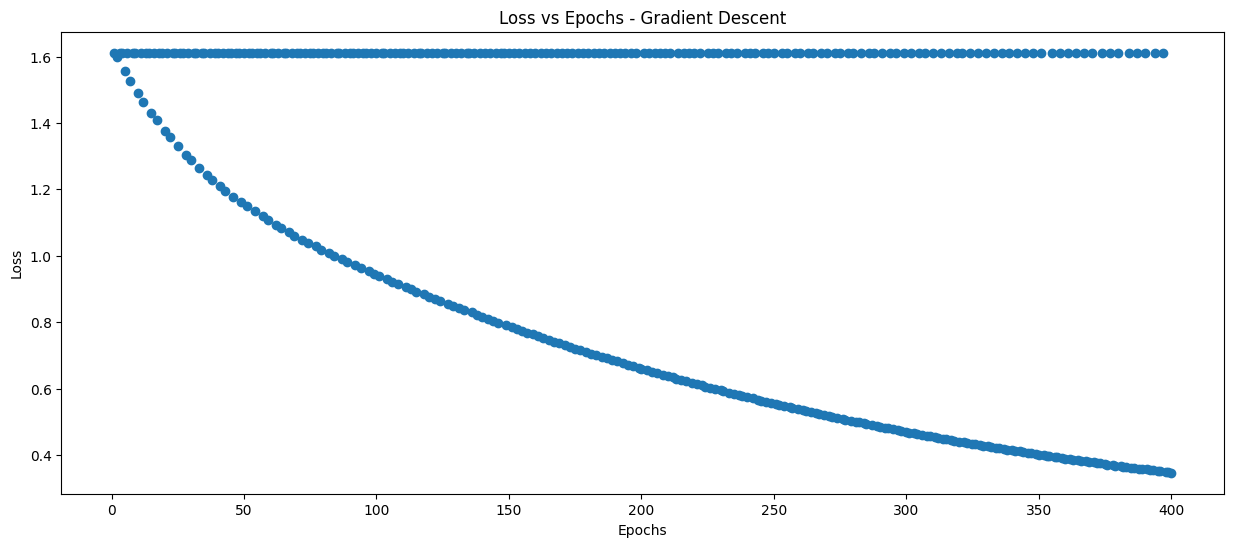

In [16]:
torch_ffn_model.fit(X_train,Y_train_encoded,0.05,400)